In [1]:
from mylib.statistic_test import *

from mylib.model import ProbabilityRNN
from mylib.field.tracker_v2 import Tracker2d

code_id = '0343 - Plot Pt to Pt+1 Curve For GatedRNN'
loc = os.path.join(figpath, code_id)
mkdir(loc)

with open(r"E:\Data\maze_learning\PlotFigures\STAT_CellReg\10227\Maze1-footprint\trace_mdays_conc.pkl", 'rb') as handle:
    trace = pickle.load(handle)

tracker = Tracker2d(trace['field_reg'])
template_seq = tracker.convert_to_sequence()

with open(r"E:\Anaconda\envs\maze\Lib\site-packages\mylib\test\demo_seq.pkl", 'wb') as handle:
    pickle.dump(template_seq, handle)

with open(r"E:\Anaconda\envs\maze\Lib\site-packages\mylib\test\demo_seq.pkl", 'rb') as handle:
    template_seq = pickle.load(handle)
    
lengths = np.array([len(seq) for seq in template_seq])
idx = np.where(lengths >= 10)[0]
template_seq = [template_seq[i] for i in idx]
print(len(template_seq))

from mylib.model import ProbabilityRNN, ContinuousHiddenStateModel
from mylib.model import HMM
from mylib.model import FeatureKnockOut

e:\Anaconda\envs\maze\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Using device: cuda
        E:\Data\FinalResults\0343 - Plot Pt to Pt+1 Curve For GatedRNN is already existed!
6276


In [2]:
model = ProbabilityRNN.process_fit(
    template_seq,
    hidden_size=16,
    lr=0.01,
    epochs=1000, 
    batch_size=2048
)

predicted_prob = model.get_predicted_prob(template_seq)

100%|██████████| 1000/1000 [02:03<00:00,  8.10it/s]


In [3]:
model.calc_loss(template_seq)
predicted_prob = model.get_predicted_prob(template_seq)

Recurrent Neural Network Model:
  Loss: 0.4608731272609387



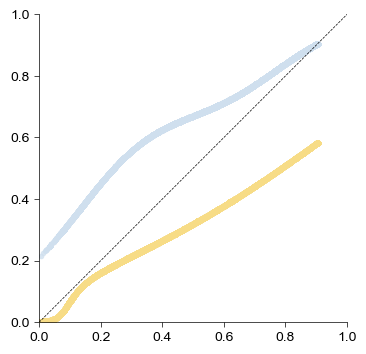

In [42]:
p_one_x, p_one_y = [], []
p_zero_x, p_zero_y = [], []

for i in range(len(predicted_prob)):
    one_idx = np.where(template_seq[i][1:-1] == 1)[0]
    zero_idx = np.where(template_seq[i][1:-1] == 0)[0]
    
    p_one_x.append(predicted_prob[i][one_idx])
    p_one_y.append(predicted_prob[i][one_idx+1])
    
    p_zero_x.append(predicted_prob[i][zero_idx])
    p_zero_y.append(predicted_prob[i][zero_idx+1])

p_one_x = np.concatenate(p_one_x)
p_one_y = np.concatenate(p_one_y)

p_zero_x = np.concatenate(p_zero_x)
p_zero_y = np.concatenate(p_zero_y)


fig = plt.figure(figsize = (4, 4))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks = True, ifyticks = True)
ax.plot(p_one_x, p_one_y, 'o', color="#CFDFEE", markersize = 4, markeredgewidth = 0, alpha=0.8)
ax.plot(p_zero_x, p_zero_y, 'o', color="#F7DC86", markersize = 4, markeredgewidth = 0, alpha=0.8)
ax.plot([0, 1], [0, 1], 'k--', linewidth=0.5)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.savefig(join(loc, f'model_predicted_p.png'), dpi=600)
plt.savefig(join(loc, f'model_predicted_p.svg'), dpi=600)
plt.show()

In [31]:
M43 = HMM.process_fit(N=20, sequences=template_seq, n_iterations=100)
M43.calc_loss(template_seq)

100%|██████████| 100/100 [00:15<00:00,  6.27it/s]


Hidden Markov Model with 20 hidden states:
  Loss: 0.4691102711957633
  Transition Matrix: tensor([[9.0277e-01, 8.9795e-02, 7.3022e-03, 1.3749e-04, 1.7626e-09, 1.9659e-11,
         3.2962e-12, 1.1672e-12, 5.5782e-13, 3.1185e-13, 1.9257e-13, 2.7729e-13,
         9.0571e-14, 6.9820e-14, 6.0730e-14, 5.9337e-14, 6.1171e-14, 6.3556e-14,
         6.4360e-14, 6.1867e-14],
        [8.7059e-01, 1.1580e-01, 1.3136e-02, 4.7340e-04, 6.8762e-08, 1.9062e-09,
         4.2420e-10, 1.6794e-10, 8.3421e-11, 4.6526e-11, 2.7983e-11, 3.1436e-11,
         1.2260e-11, 9.2811e-12, 8.1529e-12, 8.2611e-12, 8.9802e-12, 9.9996e-12,
         1.0963e-11, 1.1399e-11],
        [7.8508e-01, 1.7500e-01, 3.5614e-02, 4.2451e-03, 4.6461e-05, 4.9341e-06,
         1.5420e-06, 6.6899e-07, 3.3126e-07, 1.7596e-07, 9.8775e-08, 8.6236e-08,
         3.8460e-08, 2.8819e-08, 2.6261e-08, 2.8230e-08, 3.2318e-08, 3.7739e-08,
         4.3129e-08, 4.6020e-08],
        [4.8781e-01, 2.2835e-01, 1.0639e-01, 5.7726e-02, 6.0440e-02, 3.0118e-0

0.4691102711957633

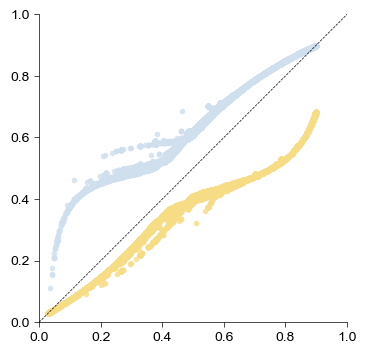

In [36]:
predicted_prob = M43.get_predicted_prob(template_seq)
p_one_x, p_one_y = [], []
p_zero_x, p_zero_y = [], []

for i in range(len(predicted_prob)):
    one_idx = np.where(template_seq[i][1:-1] == 1)[0]
    zero_idx = np.where(template_seq[i][1:-1] == 0)[0]
    
    p_one_x.append(predicted_prob[i][one_idx])
    p_one_y.append(predicted_prob[i][one_idx+1])
    
    p_zero_x.append(predicted_prob[i][zero_idx])
    p_zero_y.append(predicted_prob[i][zero_idx+1])

p_one_x = np.concatenate(p_one_x)
p_one_y = np.concatenate(p_one_y)

p_zero_x = np.concatenate(p_zero_x)
p_zero_y = np.concatenate(p_zero_y)

fig = plt.figure(figsize = (4, 4))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks = True, ifyticks = True)
ax.plot(p_one_x[one_idx], p_one_y[one_idx], 'o', color="#CFDFEE", markersize = 4, markeredgewidth = 0, alpha=0.8)
ax.plot(p_zero_x[zero_idx], p_zero_y[zero_idx], 'o', color="#F7DC86", markersize = 4, markeredgewidth = 0, alpha=0.8)
ax.plot([0, 1], [0, 1], 'k--', linewidth=0.5)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.savefig(join(loc, f'model_predicted_p_HMM20.png'), dpi=600)
plt.savefig(join(loc, f'model_predicted_p_HMM20.svg'), dpi=600)
plt.show()